# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [1]:
from typing import List


def harmonic_mean(data: List) -> float:
    return len(data) / sum([1 / value for value in data])

print(f'Średnia szybkość na całej trasie wynosi: {round(harmonic_mean([60, 80]), 2)} km/h')

Średnia szybkość na całej trasie wynosi: 68.57 km/h


### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [13]:
from numpy import array
from numpy.random import choice
from time import time

CITIZENS_QUANTITY = 700_000
SICK_RATE = 1 / 1_000

start = time()

citizens = array([False for _ in range(CITIZENS_QUANTITY)]) # False osoba zdrowa, True osoba chora
citizens[choice(CITIZENS_QUANTITY, int(CITIZENS_QUANTITY * SICK_RATE), replace=False)] = True

healthy = citizens[citizens == True]
sick = citizens[citizens == False]

healthy[choice(healthy.shape[0], int(healthy.shape[0] * 0.01), replace=False)] = False
sick[choice(sick.shape[0], int(sick.shape[0] * 0.01), replace=False)] = True

result = healthy.sum() / (healthy.sum() + sick.sum()) * 100
end_1 = time() - start
print(f'Time: {end_1}, result: {result}')

Time: 0.06299996376037598, result: 9.01639344262295


#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [18]:
def bayes_formula(chance: float, test_sensitivity: float) -> float:
    return test_sensitivity * chance / (test_sensitivity * chance + (1 - test_sensitivity) * (1 - chance))

start = time()
result = bayes_formula(chance=0.001, test_sensitivity=0.99) * 100
end_2 = time() - start

print(f'Time: {end_2}, result: {result}')

Time: 0.0, result: 9.016393442622944


In [19]:
print(f'Time difference between A) and B): {end_1 - end_2}')

Time difference between A) and B): 0.06299996376037598


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

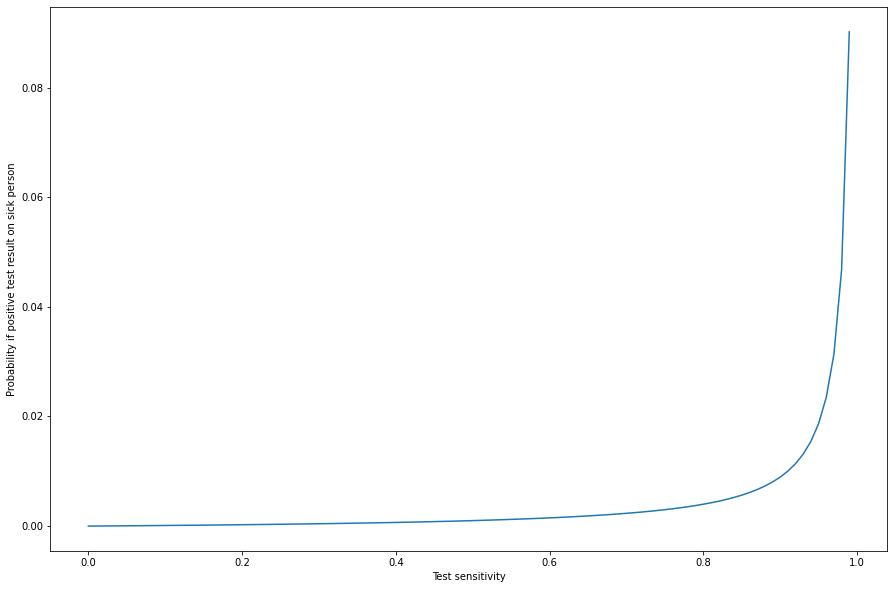

In [32]:
from matplotlib.pyplot import plot, xlabel, ylabel, title, show, figure
from numpy import arange

x = arange(0, 1, 0.01)

figure(figsize=(15, 10))
plot(x, bayes_formula(chance=0.001, test_sensitivity=x))
xlabel('Test sensitivity')
ylabel('Probability if positive test result on sick person')
show()

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [102]:
# 0 1 2 3 colors of cards
from itertools import chain
from numpy import empty
from numpy.random import shuffle
from collections import Counter


ITER_COUNT = 1_000

cards = array(list(chain(*[[0, 1, 2, 3] for _ in range(13)])))
shuffle(cards)

score = 0
hand = empty((13,))
for i in range(ITER_COUNT):
    hand = choice(cards, 13, replace=False)
    counter = Counter(hand)

    if max(counter.values()) >= 8:
        score += 1

score /= ITER_COUNT

print(f'Last hand: {hand}')
print(f'Probability of getting 8 cards in same color is {score}%')

Last hand: [2 2 1 0 3 1 0 3 3 2 2 0 3]
Probability of getting 8 cards in same color is 0.008%
